In [1]:
import json
from os import walk
from os.path import isfile, join
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

In [4]:
filepath = "/Users/matt/repos/thermal_state_prep/numerics/data/fixed_epsilon_harmonic/beta_env.json"
with open(filepath) as f:
    j = json.load(f)
    inputs = j["inputs"]
    outputs = j["outputs"]
    num_samples = j["num_samples"]
    dim_sys = j["dim_sys"]
    label = j["label"]
    if len(inputs) != len(outputs):
        raise Exception("inputs and outputs are not the same length.")
    print("len of inputs: ", len(inputs))
alphas, beta_envs, epsilons, times = set(), set(), set(), set()
for (alpha, beta_env, beta_sys, time) in inputs:
    alphas.add(alpha)
    beta_envs.add(beta_env)
    epsilons.add(beta_sys)
    times.add(time)
alphas = list(alphas)
alphas.sort()
beta_envs = list(beta_envs)
beta_envs.sort()
epsilons = list(epsilons)
epsilons.sort()
times = list(times)
times.sort()

print("alphas")
print(alphas)
print("beta_envs")
print(beta_envs)
print("epsilons")
print(epsilons)
print("times")
print(times)
    

len of inputs:  20
alphas
[0.004999999999999999]
beta_envs
[0.1, 0.12286253559934776, 0.15095202653901, 0.185463487344428, 0.22786514316233974, 0.2799608926363344, 0.34396705137956807, 0.4226066409512487, 0.5192252346839357, 0.6379332888043474, 0.7837810140573315, 0.9629732274171177, 1.1831333243475444, 1.4536276018142484, 1.7859637297609765, 2.1942803232690182, 2.695948443325881, 3.312310615921323, 4.06958880964731, 4.999999999999999]
epsilons
[0.05]
times
[500.0]


beta_env, beta_sys, time 0.004999999999999999 0.05 500.0
beta_env, num_interactions =  0.1 ,  29
beta_env, num_interactions =  0.12286253559934776 ,  39
beta_env, num_interactions =  0.15095202653901 ,  47
beta_env, num_interactions =  0.185463487344428 ,  56
beta_env, num_interactions =  0.22786514316233974 ,  63
beta_env, num_interactions =  0.2799608926363344 ,  68
beta_env, num_interactions =  0.34396705137956807 ,  72
beta_env, num_interactions =  0.4226066409512487 ,  73
beta_env, num_interactions =  0.5192252346839357 ,  70
beta_env, num_interactions =  0.6379332888043474 ,  66
beta_env, num_interactions =  0.7837810140573315 ,  60
beta_env, num_interactions =  0.9629732274171177 ,  53
beta_env, num_interactions =  1.1831333243475444 ,  47
beta_env, num_interactions =  1.4536276018142484 ,  41
beta_env, num_interactions =  1.7859637297609765 ,  36
beta_env, num_interactions =  2.1942803232690182 ,  32
beta_env, num_interactions =  2.695948443325881 ,  30
beta_env, num_interactio

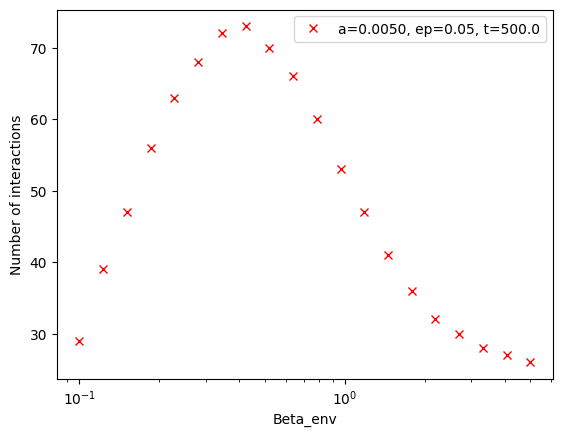

In [7]:

fixed_params = [(alphas[0], epsilons[0], times[ix]) for ix in range(len(times))]
fig = plt.figure()
colors = ['r', 'b', 'g', 'black', 'orange']
color_count = 0
for ( alpha_0, epsilon_0, time_0) in fixed_params:
    print("beta_env, beta_sys, time", alpha_0, epsilon_0, time_0)
    x = []
    y = []
    yerr = []
    for ix in range(len(inputs)):
        (alpha, beta_env, epsilon, time) = inputs[ix]
        (num_interactions, mean_dist, std_dist, dist_of_mean) = outputs[ix]
        if alpha == alpha_0 and epsilon == epsilon_0 and time == time_0:
            x.append(beta_env)
            y.append(num_interactions)

            print("beta_env, num_interactions = ", beta_env, ", ", num_interactions)
    plt.plot(x, y, marker='x', linestyle='none', label="a={:.4f}, ep={:.2f}, t={:.1f}".format(alpha_0, epsilon_0, time_0), color=colors[color_count])
    color_count += 1
plt.xscale('log')
# plt.yscale('log')
plt.xlabel("Beta_env")
plt.ylabel("Number of interactions")
plt.legend()
plt.show()